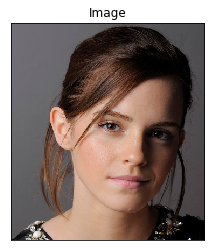

In [4]:
#displaying coloured image
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fp='F:\Semester 4\my semi 4\Image processing\images\emma.jpg'
imgo= cv.imread(fp,cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,4))
plt.imshow(imgo)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Generating the gray scale image

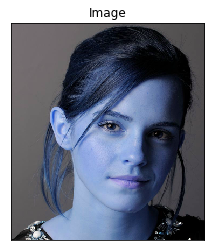

In [5]:
#displaying with matplotlib gray_scale
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fp='F:\Image processing\images\emma.jpg'
imgg= cv.imread(fp,cv.IMREAD_GRAYSCALE)
imgg = cv.cvtColor(imgo,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,4))
plt.imshow(imgg)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Generating Red, Blue and green planes of an image

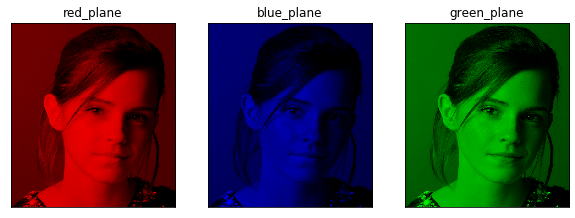

In [6]:
#displaying R G B planes separately with matplotlib
imgd=imgo.copy()
def red():
    imgd[:, :, 1]=0 
    imgd[:, :, 2]=0
def green():
    imgd[:, :, 0]=0 
    imgd[:, :, 2]=0 
def blue():
    imgd[:, :, 0]=0 
    imgd[:, :, 1]=0 
planes=[red,blue,green]
titles=['red_plane','blue_plane','green_plane']
plt.figure(figsize=(10,4))
for i in range(3):
    planes[i]()
    plt.subplot(1,3,i+1)
    plt.imshow(imgd),plt.title(titles[i]),plt.xticks([]), plt.yticks([])
    imgd=imgo.copy()
plt.show()

## Generating noisy and blurred image

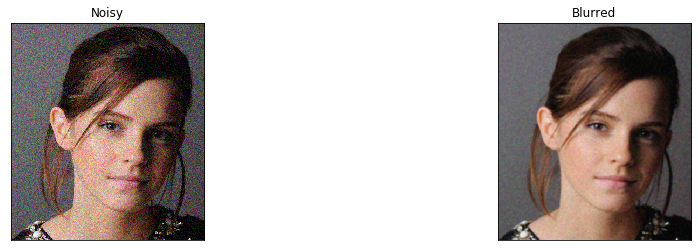

In [7]:
mu = 0.
sigma = 20.
noise = np.array(imgo.shape).astype('uint8')
noise = np.random.normal(mu,sigma,imgo.shape)
noise = noise.reshape(imgo.shape)
imgn = cv.add(imgo, noise, dtype=cv.CV_8UC3)
imgb = cv.GaussianBlur(imgn,(5,5),0)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgn), ax1.title.set_text('Noisy')
ax2.imshow(imgb), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

## Generating salt and pepper noise image and a blurred image

(405, 360, 3)


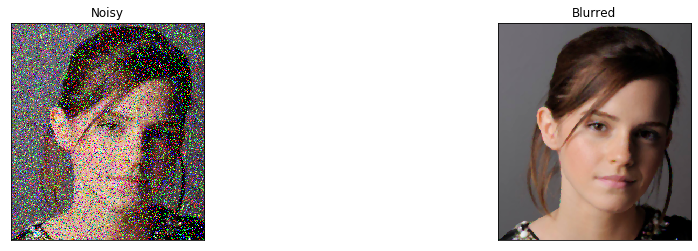

In [8]:
def salt_pepper_noise(img, p):
    print(img.shape)
    rnd = np.random.random(img.shape)
    noisy = img.copy()
    noisy[rnd < p] = 0
    noisy[rnd > 1 - p] = 255
    return noisy


imgs = salt_pepper_noise(imgo, 0.1)
imgm = cv.medianBlur(imgs, 5)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgs), ax1.title.set_text('Noisy')
ax2.imshow(imgm), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

In [179]:
import os
import sys
folder = 'F:\Image processing\images_edited\..'
fn = folder +  'galo.png'
cv.imwrite(fn, cv.cvtColor(imgo, cv.COLOR_RGB2BGR))

fn = folder +  'galn.png'
cv.imwrite(fn, cv.cvtColor(imgn, cv.COLOR_RGB2BGR))

fn = folder +  'galb.png'
cv.imwrite(fn, cv.cvtColor(imgb, cv.COLOR_RGB2BGR))

fn = folder +  'gals.png'
cv.imwrite(fn, cv.cvtColor(imgs, cv.COLOR_RGB2BGR))

fn = folder +  'galm.png'
cv.imwrite(fn, cv.cvtColor(imgm, cv.COLOR_RGB2BGR))

True

## Generating a Gaussian image

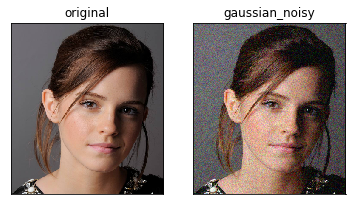

In [9]:
def guassian(img):
        height, width, channels = img.shape
        mean = 0
        var = 260
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(height, width, channels))
        gauss = gauss.reshape(height, width, channels)
        noisy = (img + gauss)
        noisy = cv.convertScaleAbs(noisy)
        return noisy
noisy=guassian(imgo)
pics=[imgo,noisy]
titles=['original', 'gaussian_noisy']
for i in range(2):
            plt.subplot(1,2,i+1)
            plt.imshow(pics[i]),plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
plt.show()

## increasing brightness of an image

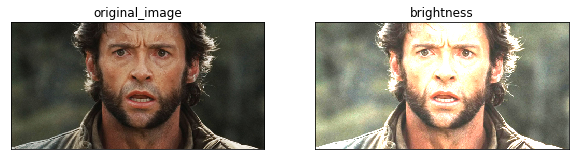

In [16]:
#increasing brightness of an image
fp='F:\Semester 4\my semi 4\Image processing\images\hugh.jpg'
imgo= cv.imread(fp,cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo,cv.COLOR_BGR2RGB)
a=2
b=30
bright=cv.addWeighted(imgo,a,np.zeros(imgo.shape,imgo.dtype),0,b)
bright1 = np.uint8(bright)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(imgo)
plt.title('original_image'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(bright1)
plt.title('brightness'),plt.xticks([]),plt.yticks([])
plt.show()

## Generating negative of an image

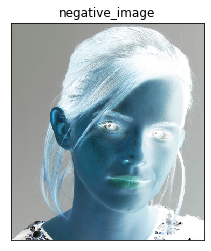

In [12]:
#displaying negative of an image
fp='F:\Semester 4\my semi 4\Image processing\images\emma.jpg'
imgo= cv.imread(fp,cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo,cv.COLOR_BGR2RGB)
negative = 255 - imgo
plt.figure(figsize = (10,4))
plt.imshow(negative)
plt.title('negative_image')
plt.xticks([]),plt.yticks([])
plt.show()

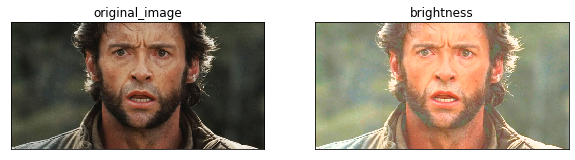

In [17]:
def increase_brightness(img, value=30):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    return img
bright=increase_brightness(imgo, value=100)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(imgo)
plt.title('original_image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(bright)
plt.title('brightness')
plt.xticks([]),plt.yticks([])
plt.show()


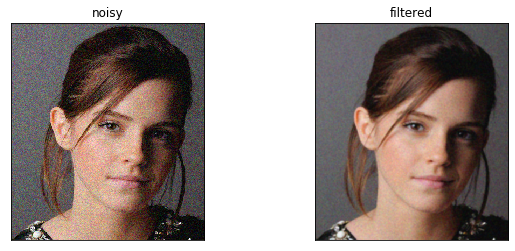

In [14]:
#gaussian filter
def gaussian_filter(img):
                gauss_filter= cv.GaussianBlur(img,(5,5),0)
                return gauss_filter
filtered=gaussian_filter(noisy)
plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(noisy),plt.title('noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered),plt.title('filtered')
plt.xticks([]), plt.yticks([])
plt.show()

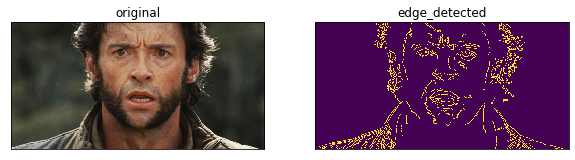

In [18]:
#edge detection
edges=cv.Canny(imgo,100,200)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(imgo)
plt.title('original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(edges)
plt.title('edge_detected'),plt.xticks([]),plt.yticks([])
plt.show()